In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential

In [2]:
data = pd.read_excel('Test11.xlsx')
train_symptoms = data.drop('التخصص', axis=1)
train_prognosis= data['التخصص']
#print(train_prognosis)
#print(train_symptoms)
print(data)

train_data_x,test_data_x,train_data_y,test_data_y = train_test_split(train_symptoms,train_prognosis, test_size=0.2,
                                                                     random_state=42)
test_x,validation_x,test_y,validation_y = train_test_split(test_data_x,test_data_y, test_size=0.5, random_state=42)


      ألم صدري حاد ينتشر للعنق  ألم صدري مفاجئ مع إقياء أو غثيان و تعرق  \
0                            1                                        1   
1                            1                                        1   
2                            1                                        1   
3                            1                                        1   
4                            0                                        0   
..                         ...                                      ...   
95                           0                                        0   
96                           0                                        0   
97                           0                                        0   
98                           0                                        0   
99                           1                                        0   

    ألم صدري عند القيام بجهد  ألم صدري عند الراحة  ألم شرسوفي(برأس المعدة)  \
0                    

C:\Users\2019\AppData\Local\Temp\ipykernel_14620\2572977736.py:12: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


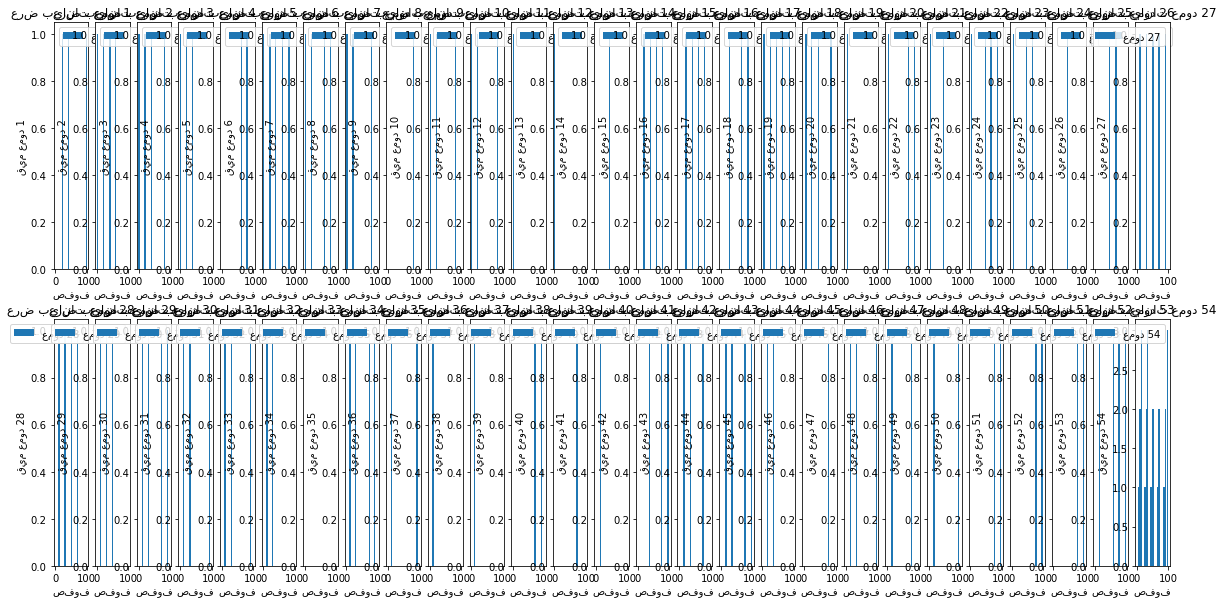

In [4]:
plt.figure(figsize=(20, 10))
num_columns = 54

for i in range(num_columns):
    plt.subplot(2, num_columns//2, i+1)
    plt.bar(data.index, data.iloc[:, i], label=f'عمود {i+1}')
    plt.xlabel('صفوف')
    plt.ylabel(f'قيم عمود {i+1}')
    plt.title(f'عرض بيانات عمود {i+1}')
    plt.legend()

plt.tight_layout()
plt.show()

In [51]:
model=tf.keras.Sequential([
                           tf.keras.Input(shape=(53,)),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dense(128,activation='relu'),
                           tf.keras.layers.Dense(4,activation='softmax')
])

In [52]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])


In [53]:
history = model.fit(
    train_data_x,
    train_data_y,
    batch_size=24,
    epochs=10,
    verbose=1,
    validation_data=(validation_x,validation_y ),
)

Epoch 1/10
4/4 [==============================] - 2s 178ms/step - loss: 1.3434 - accuracy: 0.3625 - val_loss: 1.1209 - val_accuracy: 0.9000
Epoch 2/10
4/4 [==============================] - 0s 45ms/step - loss: 1.1159 - accuracy: 0.8625 - val_loss: 0.8864 - val_accuracy: 1.0000
Epoch 3/10
4/4 [==============================] - 0s 45ms/step - loss: 0.9340 - accuracy: 0.9875 - val_loss: 0.6957 - val_accuracy: 1.0000
Epoch 4/10
4/4 [==============================] - 0s 50ms/step - loss: 0.7726 - accuracy: 1.0000 - val_loss: 0.5304 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 0s 39ms/step - loss: 0.6254 - accuracy: 1.0000 - val_loss: 0.3854 - val_accuracy: 1.0000
Epoch 6/10
4/4 [==============================] - 0s 36ms/step - loss: 0.4891 - accuracy: 1.0000 - val_loss: 0.2691 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 0s 65ms/step - loss: 0.3725 - accuracy: 1.0000 - val_loss: 0.1847 - val_accuracy: 1.0000
Epoch 8/10
4/4 [==========

In [54]:
accuracy = model.evaluate(test_x,test_y)
print('Accuracy: %.2f' % (accuracy[1]*100))

1/1 [==============================] - 0s 54ms/step - loss: 0.0694 - accuracy: 1.0000
Accuracy: 100.00


Text(0.5, 1.0, 'Train - Accuracy')

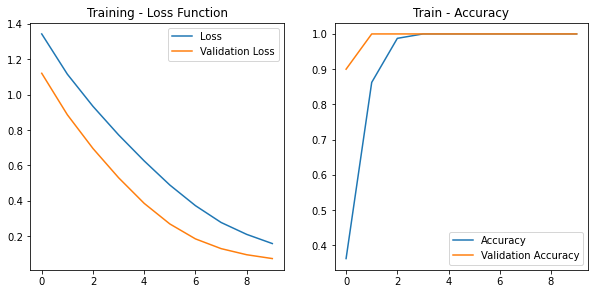

In [55]:

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [ ]:
Model=model.save('p_model.h5')

In [45]:
model.save('mnist_model.pkl')

INFO:tensorflow:Assets written to: mnist_model.pkl\assets


INFO:tensorflow:Assets written to: mnist_model.pkl\assets


In [5]:

inputs_App =['ألم صدري مع خدر و نمل في الذراع','وذمات الطرفين السفليين ثنائية الجانب',
             'إغماء لثواني','ألم شرسوفي(برأس المعدة)','إنخفاض ضغط الدم (أقل من 7سم ز)',
             'إقياء أو غثيان','ألم بطني','تشنج بطني','عسر هضم','حرقة معدة']


#inputs_App =['عسر هضم','حمى']
inputs_Network=['ألم صدري حاد ينتشر للعنق','ألم صدري مفاجئ مع إقياء أو غثيان و تعرق','ألم صدري عند القيام بجهد','ألم صدري عند الراحة','خفقان','ضيق تنفس عند القيام بجهد','زرقة في الشفاه و الأطراف','إحساس بضربات غير طبيعية','ألم صدري مع خدر و نمل في الذراع','وذمات الطرفين السفليين ثنائية الجانب','إغماء لثواني','ألم شرسوفي(برأس المعدة)','إنخفاض ضغط الدم (أقل من 7سم ز)','أرتفاع ضغط الدم (أكثر من 14سم ز)','نبض (أكثر من 100)','نبض (أقل من 60)','ضيق تنفس عند الراحة','أزيز','سعال','سعال حاد','نفث دموي','ألم و تشنجات في الصدر','حمى' ,'الأكسجة (أقل من 94)','معدل تنفس (أقل من 12)','معدل تنفس (أكثر من 20)','خدر و نمل في الذراع','أضطرابات في الذاكرة و الاستعراف','ثقل في الأطراف','أضطراب توازن','عدم توجه زماني و مكاني','رجفان في اليد','أختلاجات (جزئية أو معممة)','إغماء لفترة طويلة','أضطرابات سلوكية(فرط حركة -نقص أنتباه)','صداع','ثقل اللسان','ألم في الظهر ممتد للأطراف','أنفلات المصرات','أطراق الجفن','إمساك','إسهال','غازات','تغوط مدمى(أسود)','ألم عند البلع','تغيرات في الشهية','إقياء أو غثيان','ألم بطني','تشنج بطني','عسر هضم','حرقة معدة','كبر حجم البطن','ألم شرجي عند التغوط']

result = []
for val in inputs_Network:
    if val in inputs_App:
        result.append(1)
    else:
        result.append(0)

print(result)



[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]


In [6]:
model = tf.keras.models.load_model('p_model.h5')
result=[result]
predictions = model.predict(result)

print(predictions)

1/1 [==============================] - 2s 2s/step
[[0.54670817 0.07428611 0.03626603 0.34273967]]


In [7]:

classes = ["قلبية", "صدرية", "عصبية", "هضمية"]

max_index = np.argmax(predictions)
       
print("التخصص  :", classes[max_index])

التخصص  : قلبية


In [8]:
predictions_arr = np.array(predictions)
sorted_indexes = np.argsort(predictions_arr)

max_index = sorted_indexes[0][-1]
second_max_index = sorted_indexes[0][-2]

if predictions_arr[0][second_max_index] > 0.2:
    print("التخصص الأول:", classes[max_index])
    print("التخصص الثاني:", classes[second_max_index])
else:
    print("التخصص :", classes[max_index])

التخصص الأول: قلبية
التخصص الثاني: هضمية


In [5]:
inputs_Network=['ألم صدري حاد ينتشر للعنق','ألم صدري مفاجئ مع إقياء أو غثيان و تعرق','ألم صدري عند القيام بجهد','ألم صدري عند الراحة','خفقان','ضيق تنفس عند القيام بجهد','زرقة في الشفاه و الأطراف','إحساس بضربات غير طبيعية','ألم صدري مع خدر و نمل في الذراع','وذمات الطرفين السفليين ثنائية الجانب','إغماء لثواني','ألم شرسوفي(برأس المعدة)','إنخفاض ضغط الدم (أقل من 7سم ز)','أرتفاع ضغط الدم (أكثر من 14سم ز)','نبض (أكثر من 100)','نبض (أقل من 60)','ضيق تنفس عند الراحة','أزيز','سعال','سعال حاد','نفث دموي','ألم و تشنجات في الصدر','حمى' ,'الأكسجة (أقل من 94)','معدل تنفس (أقل من 12)','معدل تنفس (أكثر من 20)','خدر و نمل في الذراع','أضطرابات في الذاكرة و الاستعراف','ثقل في الأطراف','أضطراب توازن','عدم توجه زماني و مكاني','رجفان في اليد','أختلاجات (جزئية أو معممة)','إغماء لفترة طويلة','أضطرابات سلوكية(فرط حركة -نقص أنتباه)','صداع','ثقل اللسان','ألم في الظهر ممتد للأطراف','أنفلات المصرات','أطراق الجفن','إمساك','إسهال','غازات','تغوط مدمى(أسود)','ألم عند البلع','تغيرات في الشهية','إقياء أو غثيان','ألم بطني','تشنج بطني','عسر هضم','حرقة معدة','كبر حجم البطن','ألم شرجي عند التغوط']
print (inputs_Network)

['ألم صدري حاد ينتشر للعنق', 'ألم صدري مفاجئ مع إقياء أو غثيان و تعرق', 'ألم صدري عند القيام بجهد', 'ألم صدري عند الراحة', 'خفقان', 'ضيق تنفس عند القيام بجهد', 'زرقة في الشفاه و الأطراف', 'إحساس بضربات غير طبيعية', 'ألم صدري مع خدر و نمل في الذراع', 'وذمات الطرفين السفليين ثنائية الجانب', 'إغماء لثواني', 'ألم شرسوفي(برأس المعدة)', 'إنخفاض ضغط الدم (أقل من 7سم ز)', 'أرتفاع ضغط الدم (أكثر من 14سم ز)', 'نبض (أكثر من 100)', 'نبض (أقل من 60)', 'ضيق تنفس عند الراحة', 'أزيز', 'سعال', 'سعال حاد', 'نفث دموي', 'ألم و تشنجات في الصدر', 'حمى', 'الأكسجة (أقل من 94)', 'معدل تنفس (أقل من 12)', 'معدل تنفس (أكثر من 20)', 'خدر و نمل في الذراع', 'أضطرابات في الذاكرة و الاستعراف', 'ثقل في الأطراف', 'أضطراب توازن', 'عدم توجه زماني و مكاني', 'رجفان في اليد', 'أختلاجات (جزئية أو معممة)', 'إغماء لفترة طويلة', 'أضطرابات سلوكية(فرط حركة -نقص أنتباه)', 'صداع', 'ثقل اللسان', 'ألم في الظهر ممتد للأطراف', 'أنفلات المصرات', 'أطراق الجفن', 'إمساك', 'إسهال', 'غازات', 'تغوط مدمى(أسود)', 'ألم عند البلع', 'تغيرات في الشه